In [1]:
#

In [3]:
"""
General class architecture:

> We have a number of bench-portfolios
> We have a number of compiled portfolios
> We have their components
> Risks are evaluated either for these portfolios themselves, either for them regarding the benchs

So, let's go
"""
pass

In [ ]:
# Here go the benchs

In [4]:
import numpy
from matplotlib import pyplot

In [27]:
N = 10_000

tt = numpy.array(numpy.arange(N))
bench_00_incr = numpy.random.normal(loc=0.02, scale=0.11, size=(N,))
bench_01_incr = numpy.random.beta(a=2, b=2, size=(N,)) - 0.5 + 0.02
bench_00 = numpy.cumsum(bench_00_incr)
bench_01 = numpy.cumsum(bench_01_incr)

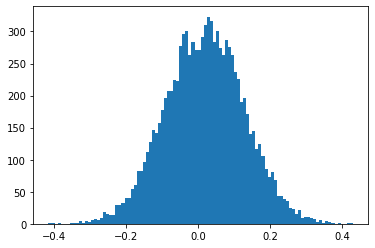

In [28]:
_ = pyplot.hist(bench_00_incr, bins=100)
pyplot.show()

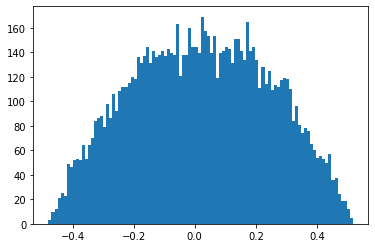

In [29]:
_ = pyplot.hist(bench_01_incr, bins=100)
pyplot.show()

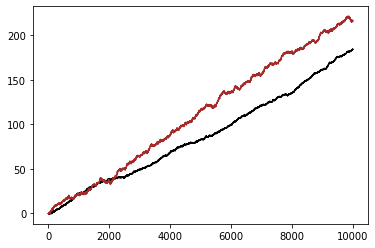

In [30]:
pyplot.plot(tt, bench_00, 'black', tt, bench_01, 'brown')

In [31]:
# Now some portfolios

In [32]:
p00_c00 = numpy.random.normal(loc=0.03, scale=2.2, size=(N,))
p00_c01 = numpy.random.normal(loc=0.035, scale=2.9, size=(N,))
p00_c02 = numpy.random.normal(loc=0.01, scale=0.1, size=(N,))
p00_c03 = numpy.random.normal(loc=0.09, scale=9.2, size=(N,))

p01_c00 = numpy.random.normal(loc=0.028, scale=2.9, size=(N,))
p01_c01 = numpy.random.normal(loc=0.031, scale=2.1, size=(N,))

In [33]:
w00 = [0.2, 0.3, 0.1, 0.4]
p00 = p00_c00 * w00[0] + p00_c01 * w00[1] + p00_c02 * w00[2] + p00_c03 * w00[3]

w01 = [0.7, 0.3]
p01 = p01_c00 * w01[0] + p01_c01 * w01[1]

In [34]:
# And finally, apply the routine

In [ ]:
def CAPM(portfolio, benchmark, model='OLS', check_pvals=False):
    
    if model == 'OLS':
        
        from sklearn.linear_model import LinearRegression as OLS
        
        model = OLS(n_jobs=-1, fit_intercept=True)
        model.fit(X=portfolio.reshape(-1, 1), y=benchmark)
        
        if check_pvals:
            
            raise NotImplemented("Not yet!")
        
        else:
            
            alpha, beta = model.intercept_, model.coef_[0]
        
    elif:
        
        raise NotImplemented("Not yet!")
    
    return alpha, beta


def SemiVariance(series):
    
    series_cut = series[series < series.mean()]
    ratio = series_cut.var(ddof=1)
    
    return ratio


def RatioTreynor(portfolio, benchmark, beta):
    
    ratio = (portfolio - benchmark).mean() / beta
    
    return ratio


def RatioSortino(portfolio, benchmark):
    
    semi_deviation = numpy.sqrt(SemiVariance(series=benchmark))
    ratio = (portfolio - benchmark).mean() / semi_deviation
    
    return ratio


def RatioSharpe(portfolio, benchmark):
    
    ratio = (portfolio - benchmark).mean() / benchmark.std(ddof=1)
    
    return ratio



In [ ]:
class RiskMachine:
    
    def __init__(self):
        
        self.benchs = []
        self.benchs_names = []
        self.portfolios = []
        self.portfolios_names = []
        
        self.N = None
        self.M = None
        
        self.ratioAlpha, self.ratioBeta = None, None
        self.ratioTreynor = None
        self.ratioSortino = None
        self.ratioSharpe = None
        self.ratioVaR = None
        self.ratioCVaR = None
        
    def add_benchs(self, benchs):
        
        self.M = len(benchs)
        self.benchs = self.benchs + benchs
    
    def add_portfolios(self, portfolios):
        
        self.N = len(benchs)
        self.portfolios = self.portfolios + portfolios
    
    def compute_measures(self):
        
        self.ratioAlpha, self.ratioBeta = ...
        self.ratioTreynor = RatioTreynor()
        self.ratioSortino = RatioSortino()
        self.ratioSharpe = RatioSharpe()
        self.ratioVaR = RatioVaR()
        self.ratioCVaR = RatioCVaR()
        
        self.ratioAlpha, self.ratioBeta = CAPM(portfolio=,benchmark=)
        self.ratioTreynor = RatioTreynor()
        self.ratioSortino = RatioSortino()
        self.ratioSharpe = RatioSharpe()
        self.ratioVaR = RatioVaR()
        self.ratioCVaR = RatioCVaR()
    
    def plot(self):
        
        

    def summary(self):
        
        self.compute_measures()
        self.plot()


In [ ]:
risk_machine = RiskMachine()
risk_machine.add_benchs([bench_00, bench_01])
risk_machine.add_portfolios([p00, p01])
risk_machine.summary()